https://github.com/RafaelGenari/Bootcamp-Project-Video-Games-Ice-Company

## Step 1/2. Data organization and preparation / Etapa 1/2. Organização e preparação dos dados

In [45]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# reading the data in the VSCode below direct from local file / leitudas dados no VSCode abaixo diretamente do arquivo local:
# after checking the data, sep = ',' was added to make the data display more organized / após verificação dos dados, foi adicionado o sep = ',' para deixar a visualização dos dados mais organizada

df_games = pd.read_csv(r'C:\Users\Rafael\Desktop\Rafael\Bootcamp\Bootcamp-Projects\Bootcamp-Projects-Github\Bootcamp-Project-Video-Games-Ice-Company\games.csv', sep = ',')

# two lines below were added to read the data directly from github / linhas abaixo foram adicionadas para ler os dados diretamente do github

# url = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Video-Games-Ice-Company/main/games.csv'
# df_games = pd.read_csv(url, sep = ',')


# reading the datasets in DataFrames / leitura dos conjuntos de dados em DataFrames

# df_games = pd.read_csv('/Users/Rafael/Desktop/Rafael/Bootcamp/Projects/Bootcamp-Projects-Github/Bootcamp-Project-Video-Games-Ice-Company/games.csv', sep = ',')

In [46]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [47]:
df_games.info() # information about the dataset / informação sobre o conjunto de dados
print()
df_games.isnull().sum() # sum of null values / soma de valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [48]:
df_games.duplicated().sum()

np.int64(0)

Checking the data it's possible to see that we don't have duplicate values, but have null values in different columns and the names are with the initial letter in uppercase

================================================================================================================

Checando os dados podemos verificar que não existem valores duplicados, porém temos valores nulos em diferentes colunas e as colunas tem a letra inicial maiúscula

In [49]:
df_games.columns # columns name / nomes

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [50]:
header = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
header_low = []

for data in header:
    header_low.append(data.lower()) # lower case columns / letras minúsculas nas colunas

df_games.columns = header_low

df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [51]:
# replacing null values with 'Unknown' or '0' / substituindo valores nulos por 'Unknown' ou '0'

df_games['name'] = df_games['name'].fillna('Unknown')
df_games['genre'] = df_games['genre'].fillna('Unknown')
df_games['rating'] = df_games['rating'].fillna('Unknown')

df_games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

In [52]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = df_games['critic_score'] / 10 # replacing 'tbd' with similar critic score / substituindo 'tbd' por nota similar ao critic score

It was possible to identify that the user critic is very similar to the critical score and that if we leave the tbd we will have problems later on in the analysis (a problem I had because it was not possible to build a graph due to having this data as str), replaced by the score which is similar so that it is possible to check the data we have.

In a real project, in order to know what to do with this data, the team responsible would be asked and would discuss with them what substitution to make or how to leave this data.

================================================================================================================

Foi possível identificar que a user critic é muito semelhante a nota do critic score e uma vez que se deixar o tbd teremos problema mais a frente na análise (problema que tive por não ser possível construir um gráfico devido ter este dado como str), substituído pela nota que é semelhante de modo a ser possível fazer uma verificação dos dados que temos.

Em um projeto real, para saber o que fazer com estes dados seria questionado a equipa responsável e discutido com os mesmo qual substituição a ser feita ou como deixar este dado.

In [53]:
# sum of the total sales of each region and adding a new column / soma de vendas de cada região e adicionando em uma nova coluna

df_games['total_sales'] = (df_games['na_sales'] +
                           df_games['eu_sales'] +
                           df_games['jp_sales'] +
                           df_games['other_sales'])

print(df_games[['name', 'total_sales']])

                                name  total_sales
0                         Wii Sports        82.54
1                  Super Mario Bros.        40.24
2                     Mario Kart Wii        35.52
3                  Wii Sports Resort        32.77
4           Pokemon Red/Pokemon Blue        31.38
...                              ...          ...
16710  Samurai Warriors: Sanada Maru         0.01
16711               LMA Manager 2007         0.01
16712        Haitaka no Psychedelica         0.01
16713               Spirits & Spells         0.01
16714            Winning Post 8 2016         0.01

[16715 rows x 2 columns]


Above, the first step was change all the uppercase letters to lowercase. After this adjustment, was replaced all the null values with 'Unknown' or '0' based in the column information and in the user_score column was changed the 'tbd' (to be determined) to '0'. The last change at the dataset was adjust the columns type to the more appropriated.

The columns that we have numbers, the null values was changed to 0 because it's the value that makes the most sense and won't get in the way if you need to use the data to make a sum and to the columns that have written information was changed to unknown once has not a important information and it's better to have a unkown than leave NaN or blank.

The columns year_of_release and critic_score, was changed the type to int because the year will never have decimals and the critic score is always a entire value without decimals.

Null values may occur because the data set is from 2016 and some information may have been lost.

================================================================================================================

Acima, a primeira etapa foi alterar todas as letras maiúsculas para minúsculas. Após esse ajuste, todos os valores nulos foram substituídos por 'Unknown' ou '0' com base nas informações da coluna e, na coluna user_score, o valor 'tbd' (a ser determinado) foi alterado para '0'. A última alteração no conjunto de dados foi ajustar o tipo das colunas para o mais apropriado.

As colunas que tinham número, os valores nulos foram altetados para 0, pois é o valor que faz mais sentido e não irá atrapalhar se caso seja necessário usar os dados para fazer uma soma e as colunas que os dados são escritos foram alterados para unknown uma vez que não havia informação importante para a adicionar e também por ser melhor do que deixar apenas NaN ou em branco.

As colunas year_of_release and critic_score, foram alteradas para o tipo int porque um ano nunca terá casas decimais e a nota dos críticos são sempre um valor inteiro sem decimais.

Os valores nulos podem ocorrer porque o conjunto de dados é de 2016 e pode ser que algumas informações foram perdidas.

## Step 3. Analyze the data / Etapa 3. Analise os dados

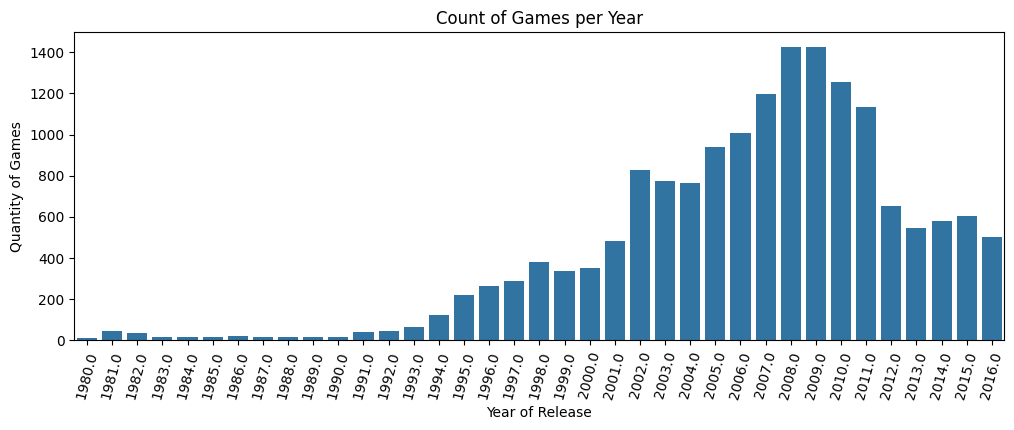

In [54]:
df_year_of_release = df_games.groupby('year_of_release')['name'].count().reset_index() # count of games per year / contagem de jogos por ano

plt.figure(figsize = (12,4))
sns.barplot(x = 'year_of_release', y = 'name', data = df_year_of_release)
plt.title('Count of Games per Year')
plt.xlabel('Year of Release')
plt.ylabel('Quantity of Games')
plt.xticks(rotation=75)
plt.show()

## See how many games were released in different years Is the data for each period significant?

The games has a variation between the years where some years has more games released than the previous year or vice versa. We can notice too that in the 90's started to have a grow up at the games released but the number get really higher in the 2010's.  

================================================================================================================

## Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

Os jogos têm uma variação entre os anos, em que alguns anos têm mais jogos lançados do que no ano anterior ou vice-versa. Podemos notar também que na década de 90 começou a haver um crescimento nos jogos lançados, mas o número ficou realmente maior na década de 2010. 

In [55]:
df_platform_life_cycle = df_games.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()
df_platform_life_cycle['life_cycle_years'] = df_platform_life_cycle['max'] - df_platform_life_cycle['min']
df_platform_life_cycle

,platform,min,max,life_cycle_years
0,2600,1980.0,1989.0,9.0
1,3DO,1994.0,1995.0,1.0
2,3DS,2011.0,2016.0,5.0
3,DC,1998.0,2008.0,10.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
6,GBA,2000.0,2007.0,7.0
7,GC,2001.0,2007.0,6.0
8,GEN,1990.0,1994.0,4.0
9,GG,1992.0,1992.0,0.0


In [56]:
df_platform_life_cycle['life_cycle_years'].mean()

np.float64(7.612903225806452)

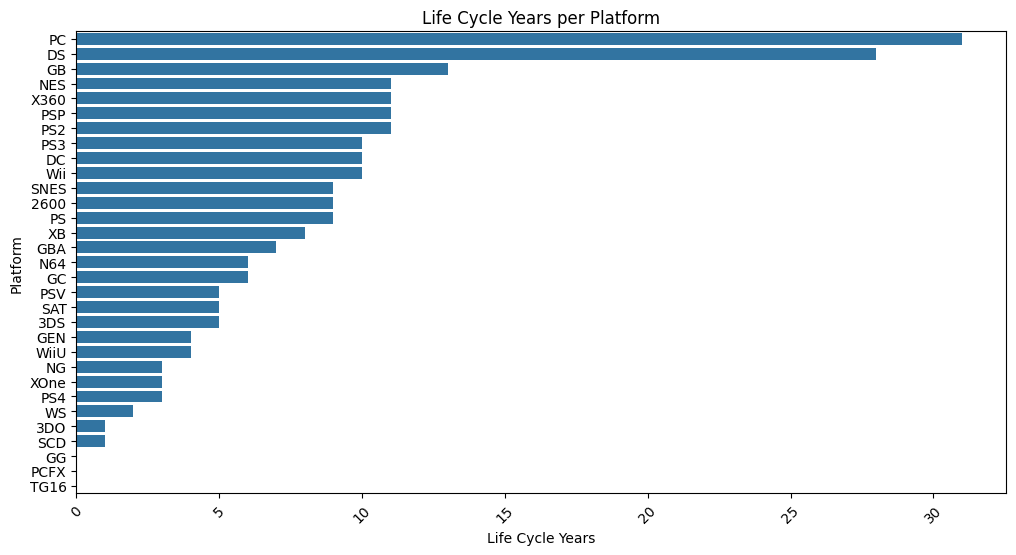

In [57]:
df_platform_life_cycle_sorted = df_platform_life_cycle.sort_values(by = 'life_cycle_years', ascending = False) # sorting values / ordenando os valores

plt.figure(figsize = (12,6))
sns.barplot(x = 'life_cycle_years', y = 'platform', data = df_platform_life_cycle_sorted)
plt.title('Life Cycle Years per Platform')
plt.xlabel('Life Cycle Years')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.show()

In [58]:
df_platform_sales_peak = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
df_platform_sales_peak = df_platform_sales_peak.sort_values(by = ['platform', 'total_sales'], ascending = [True, False])
df_platform_sales_peak = df_platform_sales_peak.drop_duplicates(subset = ['platform'], keep = 'first')
df_platform_sales_peak = df_platform_sales_peak.merge(df_platform_life_cycle[['platform', 'min']], on = 'platform', how = 'left')
df_platform_sales_peak['year_until_sales_peak'] = df_platform_sales_peak['year_of_release'] - df_platform_sales_peak['min']
mean_life_cycle_years = df_platform_sales_peak['year_until_sales_peak'].mean()
mean_life_cycle_years

np.float64(3.3870967741935485)

In [59]:
df_platform_sales_peak = df_platform_sales_peak.rename(columns = {'year_of_release' : 'year_of_high_sales'})
df_platform_sales_peak = df_platform_sales_peak.rename(columns = {'min' : 'year_of_release'})

df_platform_sales_peak

,platform,year_of_high_sales,total_sales,year_of_release,year_until_sales_peak
0,2600,1981.0,35.68,1980.0,1.0
1,3DO,1995.0,0.08,1994.0,1.0
2,3DS,2011.0,63.20,2011.0,0.0
3,DC,2000.0,5.99,1998.0,2.0
4,DS,2007.0,146.94,1985.0,22.0
5,GB,1989.0,64.97,1988.0,1.0
6,GBA,2004.0,77.91,2000.0,4.0
7,GC,2002.0,51.81,2001.0,1.0
8,GEN,1992.0,12.64,1990.0,2.0
9,GG,1992.0,0.04,1992.0,0.0


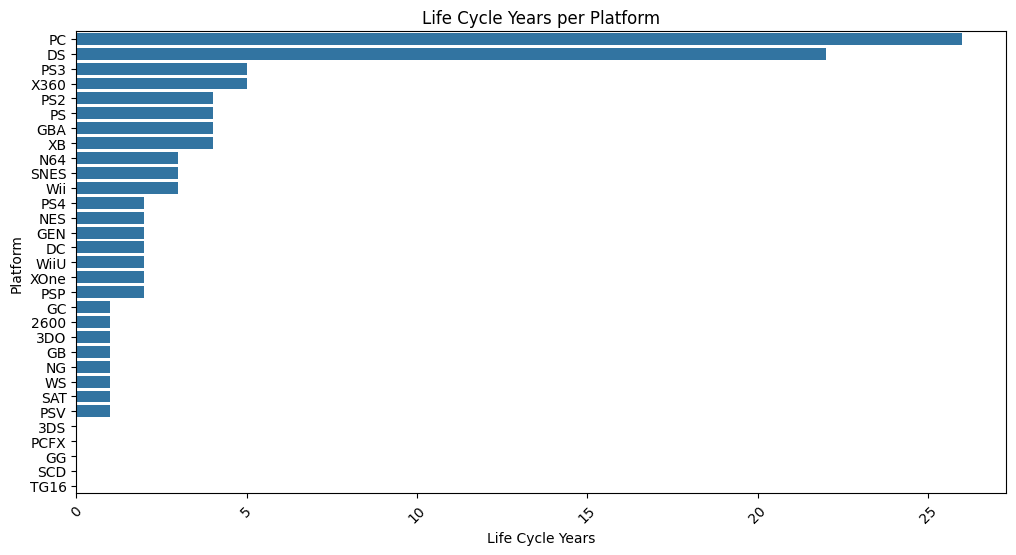

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'year_until_sales_peak', y = 'platform', data = df_platform_sales_peak.sort_values(by = 'year_until_sales_peak', ascending = False))
plt.title('Life Cycle Years per Platform')
plt.xlabel('Life Cycle Years')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.show()

# Note about the data

During the analysis, I realized that there is an error with one of the data points corresponding to the DS platform, specifically its year of release, which is showing as 1985, but it was released in 2011. In any case, I'll just leave this note to show that the analysis was done on the basis of the data that was made available, although it is clear that there is an error.

================================================================================================================

# Nota sobre os dados

Durante a análise, percebi que existe um erro com um dos dados correspondente a plataforma DS, mais especificamente o seu ano de lançamento que está a aparecer como 1985, porém o mesmo foi lançado em 2011. De todo modo, deixo apenas essa nota para mostrar que a análise foi feita com base nos dados que foram disponibilizados, contudo, percebe-se que tem um erro.

## See how sales varied from platform to platform. Choose the platforms with the highest total sales and build a distribution based on data for each year. Find the platforms that used to be popular but now have no sales. How long does it take for new platforms to appear and old ones to disappear?

- Average Platform Life Cycle
    We observed that the life cycle of a platform varies widely: some, like Game Boy (GB) and Xbox 360 (X360), remained popular for around 10 years, while others, like Game Gear (GG) and TurboGrafx-16 (TG16), were discontinued quickly, not making it past their launch year. However, when considering all platforms, we calculate that the average life cycle is 7.6 years.

- Time to Peak Sales
    The analysis also showed that the time for a platform to reach its peak sales is quite varied, depending on the characteristics of the platform and the market context at the time. Some platforms, such as the Game Gear (GG), reached their peak in the year of launch due to their short life cycle, while others, such as the Xbox 360 (X360), took approximately 5 years to reach their peak, despite their longer life cycle. On average, the time until a platform's sales peak is around 4 years.

- Popularity patterns
    Looking at trends over the years, we can identify platforms that were once dominant but have lost relevance over time. Consoles such as Atari 2600 and NES were extremely popular at their peak, but with the emergence of more advanced technological platforms such as PlayStation and Xbox, their presence was gradually reduced until they stopped generating sales.
    On the other hand, new platforms emerge to fill the space left by the old ones, although this transition process is not immediate. It takes on average between 2 and 4 years for the latest platforms to begin to replace their predecessors in a noticeable way. This dynamic highlights the continuous pace of innovation in the video games market, where new technologies attract the attention of consumers and preferences change significantly over time.

================================================================================================================

## Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

- Ciclo de Vida Médio das Plataformas
    Observamos que o ciclo de vida de uma plataforma varia amplamente: algumas, como Game Boy (GB) e Xbox 360 (X360), mantiveram-se populares por cerca de 10 anos, enquanto outras, como Game Gear (GG) e TurboGrafx-16 (TG16), foram descontinuadas rapidamente, não passando de seu ano de lançamento. No entanto, ao considerar todas as plataformas, calculamos que o ciclo de vida médio é de 7,6 anos.

- Tempo para Atingir o Pico de Vendas
    A análise também mostrou que o tempo para uma plataforma atingir seu pico de vendas é bastante variado, dependendo das características da plataforma e do contexto do mercado no período. Algumas plataformas, como o Game Gear (GG), atingiram seu pico no ano de lançamento devido ao curto ciclo de vida, enquanto outras, como o Xbox 360 (X360), demoraram aproximadamente 5 anos para alcançar seu pico, apesar de seu ciclo de vida mais longo. Em média, o tempo até o pico de vendas de uma plataforma é de cerca de 4 anos.

- Padrões de Popularidade
    Ao observar as tendências ao longo dos anos, identificamos plataformas que já foram dominantes mas perderam relevância com o tempo. Consoles como Atari 2600 e NES foram extremamente populares em seu auge, mas, com o surgimento de plataformas tecnológicas mais avançadas, como PlayStation e Xbox, sua presença foi gradualmente reduzida, até que deixaram de gerar vendas.
    Por outro lado, novas plataformas surgem para preencher o espaço deixado pelas antigas, embora esse processo de transição não seja imediato. As plataformas mais recentes demoram em média entre 2 e 4 anos para começar a substituir as anteriores de maneira notável. Essa dinâmica evidencia o ritmo contínuo de inovação no mercado de videogames, em que novas tecnologias atraem a atenção dos consumidores e as preferências mudam de forma significativa ao longo do tempo.

## Determine for which period you should take data. To do this, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Thinking about building a model for 2017, we should select data with a maximum of 5 years of difference to the desired planning in order to be able to analyze in a more complete way which platforms are or are not on the rise, as well as games.

================================================================================================================

## Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Pensando em construir um modelo para 2017, devemos selecionar dados com no máximo 5 anos de diferença para o planejamento desejado para conseguir analisar de uma forma mais completa quais plataformas estão ou não em ascensão, assim como os jogos.


In [61]:
df_2012_ahead = df_games.query('year_of_release >= 2012 and year_of_release <= 2017')
df_2012_ahead

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [62]:
df_sales_per_plataform = df_2012_ahead.groupby(['platform','year_of_release'])['total_sales'].count().reset_index() # count of games per platform / contagem de jogos por plataforma

df_sales_per_plataform_sorted = df_sales_per_plataform.sort_values(by = 'total_sales', ascending = True) # sorting values / ordenando os valores

df_sales_per_plataform_sorted

,platform,year_of_release,total_sales
34,Wii,2016.0,1
24,PSP,2015.0,3
33,Wii,2015.0,4
32,Wii,2014.0,6
6,DS,2013.0,8
23,PSP,2014.0,10
31,Wii,2013.0,12
44,X360,2016.0,13
39,WiiU,2016.0,14
17,PS4,2013.0,16


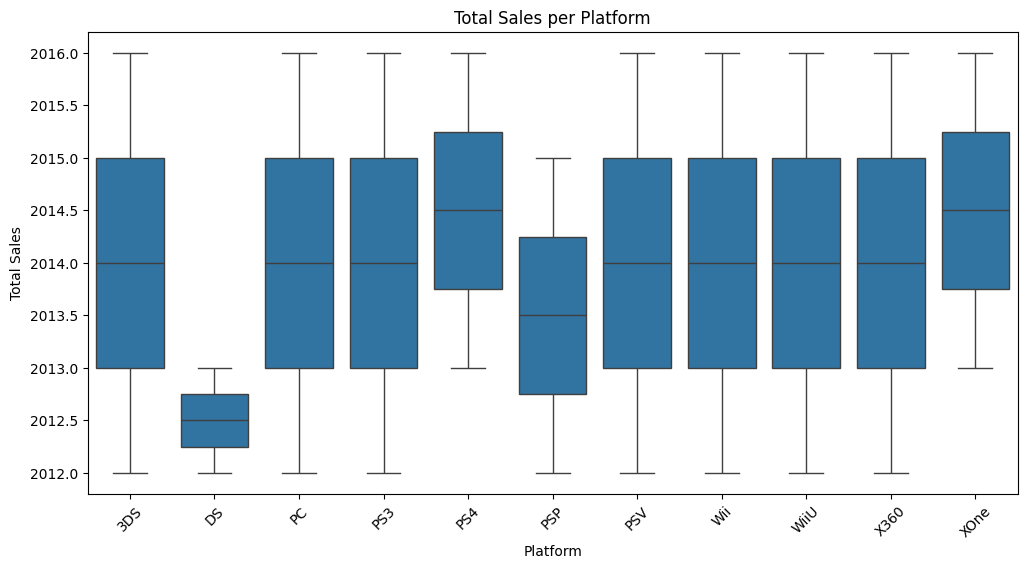

In [63]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'platform', y = 'year_of_release', data = df_sales_per_plataform)
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [64]:
mean_sales = df_2012_ahead.groupby('platform')['total_sales'].mean()
mean_sales = mean_sales.sort_values(ascending = True)
mean_sales

platform
PSP     0.064682
PSV     0.119659
PC      0.250600
DS      0.404839
3DS     0.491439
WiiU    0.559116
PS3     0.585781
XOne    0.645020
Wii     0.655000
PS4     0.801378
X360    0.810068
Name: total_sales, dtype: float64

## Build a box diagram for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales across platforms? Describe your findings.

In summary, the graph shows that platforms such as PS3 and X360 have had a life cycle with high sales and a wide distribution of sales over time, while older platforms such as DS and PSP have had lower sales more quickly, which reflects the evolution of the market and the appearance of new platforms.

Platforms such as 3DS, PS3, PS4, and X360 have higher boxes, suggesting a greater variation in sales over the years, while others, such as DS and PSP, show less variation indicating a decline in sales. In addition, we can see that more recently launched platforms (XOne and PS4) have more recent sales totals, close to 2015.

================================================================================================================

## Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

Em resumo, o gráfico mostra que plataformas como PS3 e X360 tiveram um ciclo de vida com vendas elevadas e uma distribuição ampla de vendas ao longo do tempo, enquanto plataformas mais antigas, como DS e PSP, tiveram vendas menores mais rapidamente, o que reflete a evolução do mercado e o aparecimento de novas plataformas.

Plataformas como 3DS, PS3, PS4, e X360 têm caixas mais altas, sugerindo uma variação maior nas vendas ao longo dos anos, enquanto outras, como o DS e o PSP, apresentam menos variação indicando m declínio de vendas. Além disso, podemos notar que plataformas lançadas mais recentes (XOne e PS4) tem um total de vendas mais recentes, próximo a 2015.

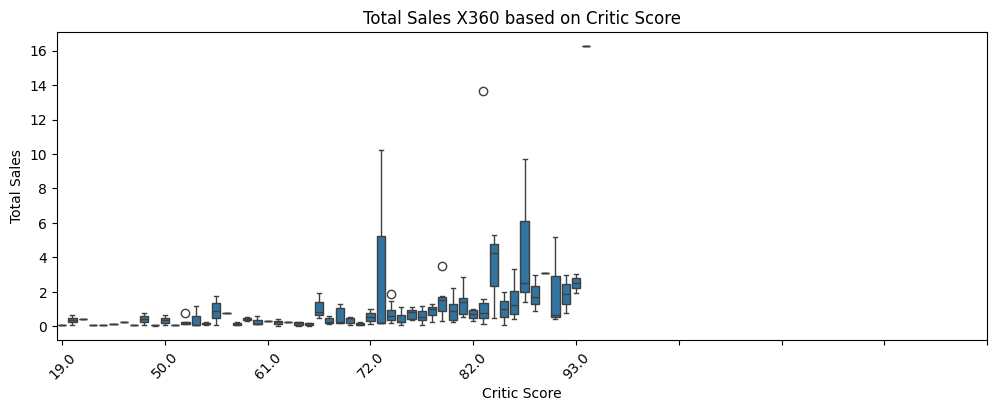

In [65]:
df_X360 = df_2012_ahead[df_2012_ahead['platform'] == 'X360'] # filter dataframe by X360 platform / filtrar dataframe pela plataforma X360

plt.figure(figsize = (12,4))
sns.boxplot(x = 'critic_score', y = 'total_sales', data = df_X360)
plt.title('Total Sales X360 based on Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

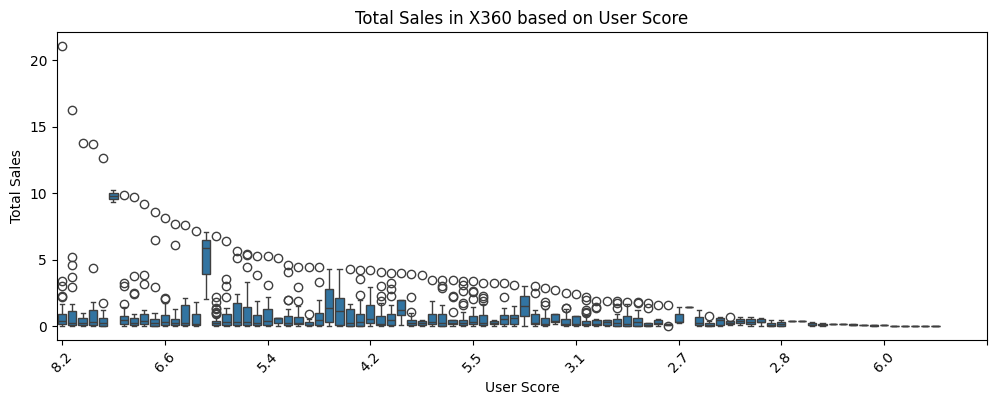

In [66]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'user_score', y = 'total_sales', data = df_2012_ahead)
plt.title('Total Sales in X360 based on User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

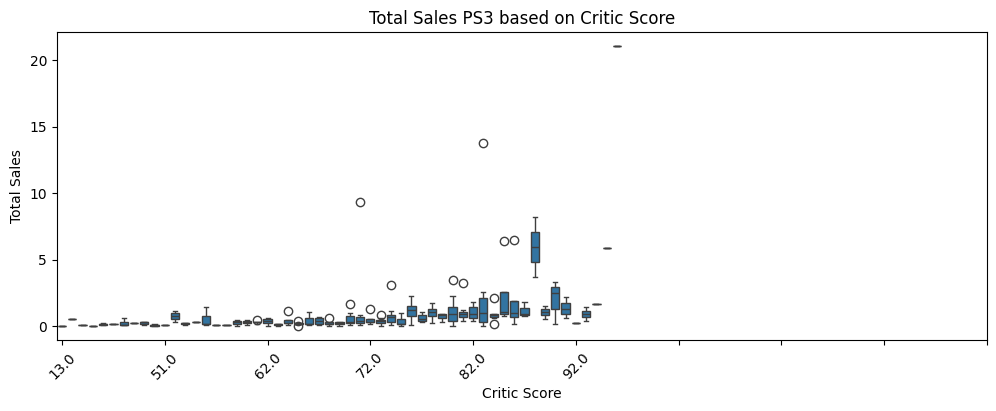

In [67]:
# creating dataframe for PS3 to compare the datas from X360 / criando dataframe para PS3 para comparar os dados do X360

df_PS3 = df_2012_ahead[df_2012_ahead['platform'] == 'PS3'] # filter dataframe by PS3 platform / filtrar dataframe pela plataforma PS3

plt.figure(figsize = (12,4))
sns.boxplot(x = 'critic_score', y = 'total_sales', data = df_PS3)
plt.title('Total Sales PS3 based on Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

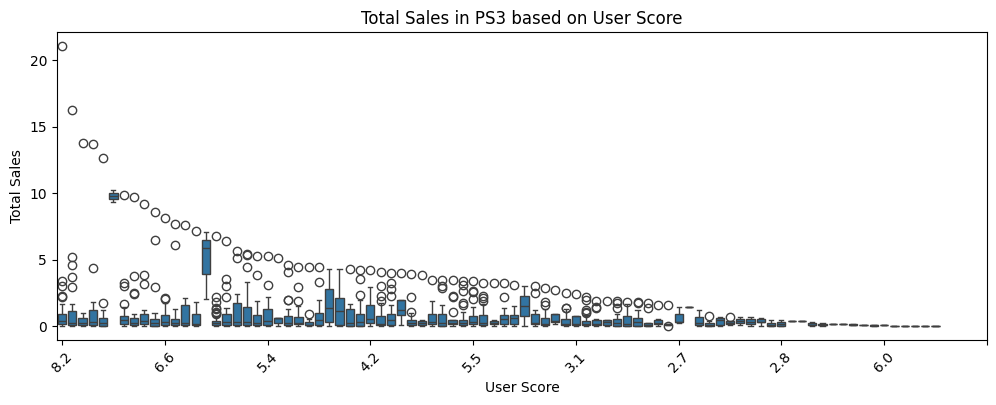

In [68]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'user_score', y = 'total_sales', data = df_2012_ahead)
plt.title('Total Sales in PS3 based on User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.xticks(ticks = range(0, 97, 10))
plt.xticks(rotation=45)
plt.show()

In [69]:
genre_sales_2012 = df_2012_ahead.groupby('genre')['total_sales'].sum().reset_index() # total sales per genre / vendas totais por genero

genre_sales_2012 = genre_sales_2012.sort_values(by = 'total_sales', ascending = False) # sorting values / ordenando os valores

genre_sales_2012

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


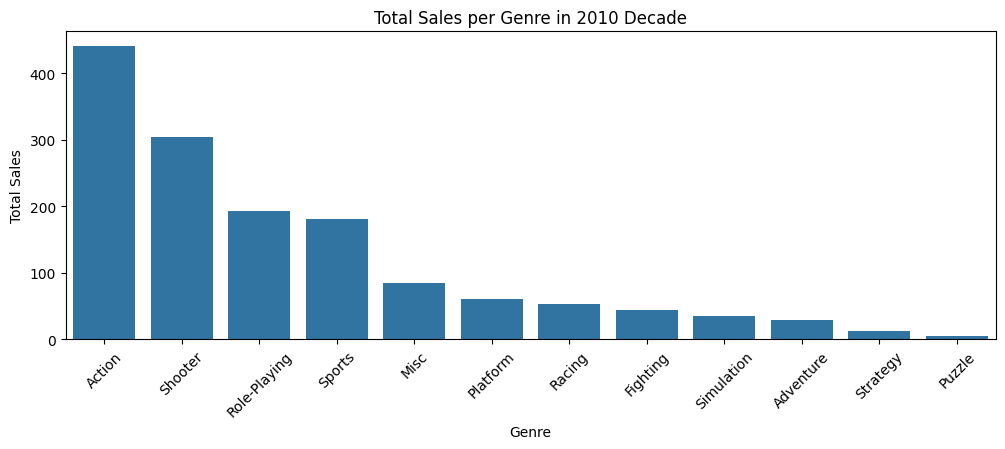

In [70]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'genre', y = 'total_sales', data = genre_sales_2012)
plt.title('Total Sales per Genre in 2010 Decade')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Analysis of reviews and sales on gaming platforms  

- See how user and professional reviews affect sales on a popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- With these conclusions in mind, compare sales on other platforms.
- Take a look at the overall distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

The platform chosen was X360. It can be seen that, based on the critics' scores, games with a score of 72.0 or more have a higher sales volume, while games with scores much lower than this have a very small sales volume, with some scores having a slightly higher sales peak than others. However, when checking sales based on user ratings, we see a better distribution of independent sales and their ratings, where for example there are games with lower ratings and more sales than games with higher ratings. In this way, we can conclude that there is a difference in sales based on scores, but we can't take this into account since one of the graphs shows that even the lowest scores have an ok amount of sales.

Compared to the sales of other platforms, in this case I've selected the PS3 which is the platform competing with the previous one and which has the highest number of sales, we can see that the data based on the critics' and users' scores are very similar in general, and we can draw the conclusion that the scores may influence sales, but it won't be this that makes the game sell more or less.

On the subject of genres, we can see that the most profitable genres are generally more generic and appealing to the general public, even today, while when we leave the top 5 we realize that they end up being games for a more specific niche. If we take the data and the graph into account, we can say that we can generalize which genres sell more or less, but a game from another niche with low sales, in general, can sell just as much as one in the Top 5 and just not appear as much in the overall statistics because of the overall sales average.

================================================================================================================

### Análise das avaliações e vendas em plataformas de jogos  

- Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
- Com essas conclusões em mente, compare as vendas em outras plataformas.
- Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Plataforma escolhida foi  X360. Pode-se identificar que baseado na nota dos críticos, os jogos com uma nota igual ou maior que 72.0 tem uma maior volume de vendas, enquanto os jogos que as notas são bem mais baixas que este valor tem um volume de venda muito pequeno, tendo algumas notas um pico de venda um pouco maior que outro. Contudo, ao verificar as vendas com base na nota de usuários, vemos uma melhor distribuição das vendas independente e suas notas, onde por exemplo há jogos com menor nota e maior número de venda do que jogos com notas mais altas. Deste modo, podemos concluir que existe sim uma diferença nas vendas baseado nas notas, porém não podemos levar isso em consideração uma vez que em um dos gráficos que mesmo nas menores notas temos uma quantidade ok de vendas.

Comparando com a venda de outras plataformas, neste caso selecionei o PS3 que é a plataforma concorrente da anterior e que tem o maior número de vendas vendas, vemos que os dados com base nas notas dos críticos e dos usuários são bem parecidos de modo geral, podendo tirar a conclusão de que as notas podem sim influenciar nas vendas, mas não será isso que faz com que o jogo venda mais ou menos.

Referente a questão dos gêneros, podemos ver que os gêneros mais lucrativos são de modo geral mais genérico e de agrado do público geral, até mesmo nos dias de hoje, enquanto ao deixar o top 5 percebemos que acabam por ser jogos para um nicho mais específico. Se levarmos em consideração os dados e o gráfico montado podemos dizer que podemos generalizar os gêneros que vendem mais ou menos, porém um jogo de outro nicho com uma venda baixa, de modo geral, pode ser tão vendido quanto um que está Top 5 e apenas não aparecer tanto na estatística geral por conta da média geral das vendas.

## Step 4. Create a user profile for each region / Etapa 4. Crie um perfil de usuário para cada região

In [71]:
df_na_sales_platform = df_2012_ahead.groupby(['platform', 'genre', 'rating'])['na_sales'].sum().reset_index() # creating dataframe for NA sales / criando dataframe para vendas em NA
df_eu_sales_platform = df_2012_ahead.groupby(['platform', 'genre', 'rating'])['eu_sales'].sum().reset_index() # creating dataframe for EU sales / criando dataframe para vendas em EU
df_jp_sales_platform = df_2012_ahead.groupby(['platform', 'genre', 'rating'])['jp_sales'].sum().reset_index() # creating dataframe for JP sales / criando dataframe para vendas em JP

In [72]:
df_na_platform_sales = df_2012_ahead.groupby('platform')['na_sales'].sum().reset_index() # total sales in NA per platform / vendas totais por plataforma em NA
df_na_platform_sales = df_na_platform_sales.sort_values(by = 'na_sales', ascending = False)

df_na_platform_sales.head(5)

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [73]:
df_eu_platform_sales = df_2012_ahead.groupby('platform')['eu_sales'].sum().reset_index() # total sales in EU per platform / vendas totais por plataforma em EU
df_eu_platform_sales = df_eu_platform_sales.sort_values(by = 'eu_sales', ascending = False)

df_eu_platform_sales.head(5)

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [74]:
df_jp_platform_sales = df_2012_ahead.groupby('platform')['jp_sales'].sum().reset_index() # total sales in JP per platform / vendas totais por plataforma em JP
df_jp_platform_sales = df_jp_platform_sales.sort_values(by = 'jp_sales', ascending = False)

df_jp_platform_sales.head(5)

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [75]:
df_top_na_genre = df_na_sales_platform.groupby('genre')['na_sales'].sum().reset_index() # top 5 genres in NA / top 5 generos em NA

df_top_na_genre = df_top_na_genre.sort_values(by = 'na_sales', ascending = False)

df_top_na_genre.head(5)

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [76]:
df_top_eu_genre = df_eu_sales_platform.groupby('genre')['eu_sales'].sum().reset_index() # top 5 genres in EU / top 5 generos em EU

df_top_eu_genre = df_top_eu_genre.sort_values(by = 'eu_sales', ascending = False)

df_top_eu_genre.head(5)

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [77]:
df_top_jp_genre = df_jp_sales_platform.groupby('genre')['jp_sales'].sum().reset_index() # top 5 genres in JP / top 5 generos em JP

df_top_jp_genre = df_top_jp_genre.sort_values(by = 'jp_sales', ascending = False)

df_top_jp_genre.head(5)

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


In [78]:
df_rating_na = df_na_sales_platform.groupby('rating')['na_sales'].sum().reset_index() # ratings in NA / classificacoes em NA

df_rating_na = df_rating_na.sort_values(by = 'na_sales', ascending = False)

df_rating_na

,rating,na_sales
2,M,231.57
0,E,114.37
4,Unknown,103.31
1,E10+,75.70
3,T,66.02


In [79]:
df_rating_eu = df_eu_sales_platform.groupby('rating')['eu_sales'].sum().reset_index() # ratings in EU / classificacoes em EU

df_rating_eu = df_rating_eu.sort_values(by = 'eu_sales', ascending = False)

df_rating_eu

,rating,eu_sales
2,M,193.96
0,E,113.03
4,Unknown,91.50
1,E10+,55.37
3,T,52.96


In [80]:
df_rating_jp = df_jp_sales_platform.groupby('rating')['jp_sales'].sum().reset_index() # ratings in JP / classificacoes em JP
 
df_rating_jp = df_rating_jp.sort_values(by = 'jp_sales', ascending = False)

df_rating_jp

,rating,jp_sales
4,Unknown,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


## For each region (AN, EU, JP), determine:

- The five main platforms. Describe the variations in their market shares from region to region.
- The five main genres. Explain the difference.
- Do the ESRB rankings affect sales in individual regions?

The top 5 in NA and EU are exactly the same, with only the order of platforms differing. Comparing these two regions, despite having similar platforms, sales are totally different, with the biggest difference being the number of sales of the X360 platform, where the NA region has almost twice as many sales as the EU. The top 5 in JP has only two platforms similar to the other regions (PS3 / PS4), but the number of sales is much lower. In addition, we can see that the top 1 in this region is a portable console (3DS), unlike the other regions which are consoles. In addition, JP is the region with the fewest sales overall.

As for the main genres, in NA and EU the top 5 is basically the same, with just one change in the fifth position, where in NA it's Misc and in EU it's Racing. In JP we have a top 5 with 3 genres that are the same as the others and two that are different. Role-Playing / Action / Misc are the same and Simulation and Fighting are different. The ranking is exactly in this order and in general, the only genre that is unanimous in the top 2 of all regions is Action.

When looking at whether the ESBR rating affects sales individually in the regions, we can see that the “M” and “E” ratings dominate sales in the NA and EU regions. This indicates that although there is a strong market for family games, the adult audience has a significant share of total sales, especially for games aimed at a more mature audience (“M” rating). With the data we have, the Japanese market has a slightly different scenario as the list contains many titles with an “Unknown” rating, which may reflect differences in the way games are rated or indeed the lack of this data in the data set we have. In addition, games with an “E” (Everyone) rating are the most popular among the rated titles.

================================================================================================================

## Para cada região (AN, UE, JP), determine:

- As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
- Os cinco principais gêneros. Explique a diferença.
- As classificações do ESRB afetam as vendas em regiões individuais?

O top 5 de NA e EU é exatamente o mesmo, tendo apenas diferença na ordem das plataformas. Comparando essas duas regiões, apesar de terem plataformas semelhantes as vendas são totalmente diferentes, tendo como grande diferença o número de vendas da plataforma X360, em que na região NA temos quase o dobro de vendas do que EU. Já o top 5 JP tem apenas duas plataforma semelhante as demais regiões (PS3 / PS4), porém o número de venda muito menor. Além disso, podemos notar que o top 1 dessa região é um console portátil (3DS), diferente das outras regiões que são consoles. Além disso, JP é a região com menos venda de modo geral.

Os principais gêneros, em NA e EU o top 5 é basicamente o mesmo, tendo apenas uma troca na quinta posição em que em NA é Misc e em EU é Racing. Já em JP temos um top 5 com 3 gêneros iguais as demais e outros dois diferentes. Temos como igual Role-Playing / Action / Misc e de diferente temos Simulation e Fighting. O ranking está exatamente nesta ordem e de modo geral, o único gênero que é unânime no top 2 de todas as regiões, é o Action.

Ao olhar se a classificação ESBR afetam as vendas individualmente nas regiões, podemos notar que as classificações "M" e "E" dominam as vendas nas regiões NA e EU. Isso indica que, embora haja um forte mercado para jogos familiares, o público adulto tem uma participação significativa nas vendas totais, especialmente para jogos voltados para um público mais maduro (classificação "M"). Com os dados que temos, o mercado japonês tem um cenário um pouco diferente por na lista ter muitos títulos com classificação "Unknown", que pode refletir diferenças na forma como os jogos são classificados ou realmente a falta deste dado neste conjunto de dados que temos. Além disso, jogos com classificação "E" (Everyone) são os mais populares entre os títulos classificados.

## Step 5. Hypothesis testing / Etapa 5. Teste de hipóteses

In [81]:
# converting user_score to float to be able to compare values / convertendo user_score para float para poder comparar valores

df_2012_ahead['user_score'] =df_2012_ahead['user_score'].astype(float)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_3984\3764851698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012_ahead['user_score'] =df_2012_ahead['user_score'].astype(float)


In [82]:
user_score_xone = df_2012_ahead[df_2012_ahead['platform'] == 'XOne']['user_score'] # filter dataframe by XOne platform per user score / filtrar dataframe pela plataforma XOne por classificação de usuário
user_score_pc = df_2012_ahead[df_2012_ahead['platform'] == 'PC']['user_score'] # filter dataframe by PC platform per user score / filtrar dataframe pela plataforma PC por classificação de usuário

if (user_score_xone.var() == user_score_pc.var()):
    score_result = ttest_ind(user_score_xone, user_score_pc, equal_var = True) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa
else:
    score_result = ttest_ind(user_score_xone, user_score_pc, equal_var = False) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa

alpha = 0.05
score_result.pvalue < alpha

np.False_

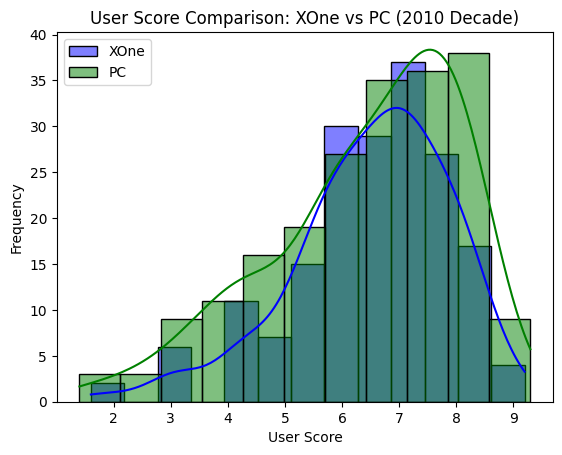

In [83]:
# histogram of user score in XOne to help analyse the hypothesis test / histograma da classificação de usuarios no XOne para ajudar na análise do teste hipotético

sns.histplot(x = user_score_xone, color = 'blue', label = 'XOne', kde=True, alpha=0.5)
sns.histplot(x = user_score_pc, color = 'green', label = 'PC', kde=True, alpha=0.5)
plt.title('User Score Comparison: XOne vs PC (2010 Decade)')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.legend(); 

In [84]:
# making ttest more visual / deixando o ttest mais visual

print('p-value: ', score_result.pvalue)
if score_result.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários das plataformas Xbox One e PC.")
else:
    print("Não rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários das plataformas Xbox One e PC.")

p-value:  nan
Não rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários das plataformas Xbox One e PC.


In [85]:
user_score_action = df_2012_ahead[df_2012_ahead['genre'] == 'Action']['user_score'] # filter dataframe by genre Action per user score / filtrar dataframe pelo genero Ação por classificação de usuário
user_score_sports = df_2012_ahead[df_2012_ahead['genre'] == 'Sports']['user_score'] # filter dataframe by genre Sports per user score / filtrar dataframe pelo genero Esporte por classificação de usuário

if (user_score_action.var() == user_score_sports.var()):
    score_genre_result = ttest_ind(user_score_action, user_score_sports, equal_var = True) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa
else:
    score_genre_result = ttest_ind(user_score_action, user_score_sports, equal_var = False) # running ttest to verify null or alternative hypothesis / rodagem ttest para verificação hipótese nula ou alternativa

alpha = 0.05
score_genre_result.pvalue < alpha

np.False_

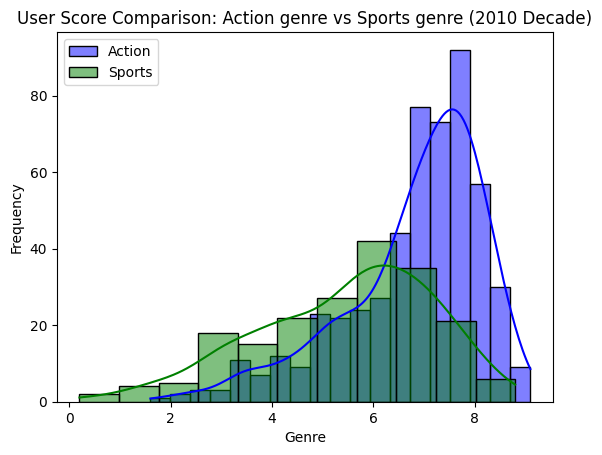

In [86]:
# histogram of user score in XOne to help analyse the hypothesis test / histograma da classificação de usuarios no XOne para ajudar na análise do teste hipotético

sns.histplot(x = user_score_action, color = 'blue', label = 'Action', kde=True, alpha=0.5)
sns.histplot(x = user_score_sports, color = 'green', label = 'Sports', kde=True, alpha=0.5)
plt.title('User Score Comparison: Action genre vs Sports genre (2010 Decade)')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.legend(); 

In [87]:
# making ttest more visual / deixando o ttest mais visual

print('p-value: ', score_genre_result.pvalue)
if score_genre_result.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários para os gêneros Action (ação) e Sports (esportes).")
else:
    print("Não rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários para os gêneros Action (ação) e Sports (esportes).")

p-value:  nan
Não rejeitamos a hipótese nula: há uma diferença significativa na classificação média dos usuários para os gêneros Action (ação) e Sports (esportes).


## How you formulate the alternative and null hypotheses.
## What criteria you used to test the hypotheses, and why

Since two parameters are being compared, the null hypothesis in this case will occur if a significant difference is identified between them when the ttest is carried out, however, if no such difference is verified, we will discard the null hypothesis and base ourselves on the alternative hypothesis, which will be that there is no significant difference.

Two tests were carried out, as we found two different situations: both tests used the average ratings of the users, with the first test using the Xbox One (XOne) / PC platforms and the second test using the Action / Sports game genres.

In the first test we can see that there is a difference between the scores of PC users, with a positive difference compared to XOne users. In the second test, the difference is much more noticeable in the user ratings for the Action and Sports genres. 

================================================================================================================

## Como você formula as hipóteses alternativas e nulas.
## Quais critérios você usou para testar as hipóteses, e por quê

Uma vez que está sendo comparado dois parâmetros, a hipótese nula neste caso irá acontecer se for identificada uma diferença significativa entre os mesmos quando realizado o ttest, contudo, se não for verificada tal diferença iremos descartar a hipótese nula e nos basear na hipótese alternativa que será não ter uma grande diferença.

Foram feitos dois testes, pois verificamos duas situações diferentes: ambos os testes foram utilizadas as classificações médias dos usuários, sendo no primeiro teste os parâmetros utilizados as plataformas Xbox One (XOne) / PC e no segundo teste os gêneros de jogos Action (ação) / Sports (esportes).

No primeiro teste podemos notar que existe uma diferença entre as notas de usuários do PC, em uma diferença positiva em relação aos usuários de XOne. Já no segundo teste, a diferença é muito mais notável na classificação dos usuários para os gêneros Action (ação) e Sports (esportes). 

# Step 6. Write a general conclusion

We were able to identify that there are significant differences in user ratings, for example between Xbox One (XOne) and PC, as well as the same difference when it comes to genre. In addition, games with a good rating from critics have good sales, however, when this is analyzed by user ratings we see that there is a better distribution of sales in general, so we can conclude that it is not the game's rating that will define whether it will be a sales success.

It was also possible to see that when platforms are newly launched, they don't have as high a volume of game sales as platforms that were already on the market, but they have great potential for growth and should be the focus for the following years. Still on this subject, we have noticed that very old platforms that were a success have lost strength over the years, with the launch of new platforms with new technologies, and even “disappearing” from the sales scene.

So, for the 2017 campaign, based on the data analyzed, I have the following observations:

- Genres to watch out for:

    - Action (top 1 in 2 regions and top 2 in the other)
    - Shooter (top 2 in 2 regions)
    - Role-Playing (top 1 in JP, top 4 in EU and top 5 in NA)
    - Misc (top 3 in JP, top 4 in NA and top 5 in EU)
    - Sports (top 3 in two regions)
    
- Platforms to watch out for:

    - XOne and PS4 - Newly launched platforms that are experiencing good growth
    - X360 and PS3 - Platforms 

================================================================================================================

# Etapa 6. Escreva uma conclusão geral

Conseguimos identificar que existem diferenças significativas nas classificações dos usuários, como por exemplo entre Xbox One (XOne) e PC, além de também existir a mesma diferença quando falamos de gênero. Além disso, jogos com classificação boa por parte dos críticos tem boas vendas, contudo, quando analisado esse quesito pela classificação dos usuários vemos que existe uma melhor distribuição das vendas de modo geral podendo então concluir que não será a nota do jogo que definirá se será um sucesso de venda.

Foi possível notar também que as plataformas quando são recém lançadas não tem um grande volume de venda de jogos quanto plataformas que já estavam no mercado, porém tem grande potencial de crescimento devendo ser o foco para os anos seguintes. Ainda neste assunto, percebemos que plataformas muito antigas e que eram um sucesso foram perdendo forças durante os anos, com o lançamento de novas plataformas com novas tecnologias, e até mesmo "sumindo" do cenário das vendas.

Sendo assim, para a campanha de 2017, com base nos dados analisados, deixo as seguintes observações:

- Gêneros para ter uma atenção:

    - Action (top 1 em 2 regiões e top 2 na outra)
    - Shooter (top 2 em 2 regiões)
    - Role-Playing (top 1 em JP, top 4 em EU e top 5 em NA)
    - Misc (top 3 em JP, top 4 em NA e top 5 em EU)
    - Sports (top 3 em duas regiões)

- Plataformas para ter atenção:

    - XOne e PS4 - Plataformas recém lançadas e que estão com bom crescimento
    - X360 e PS3 - Plataformas já consolidadas e continuam com bons números de venda
    - PC - Possível crescimento de vendas com base nos dados